<a href="https://colab.research.google.com/github/Shifath472533/All-Image-captioning-models-and-links-for-data-sets-in-Bangla/blob/master/Calculating_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculation of Metrics for Image Captioning**

## Using nlgeval Library

In [0]:
!pip install git+https://github.com/Maluuba/nlg-eval.git@master

In [0]:
!nlg-eval --setup

Example Documentation Code

In [0]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import os
import unittest

import nlgeval
from nlgeval import NLGEval


class TestNlgEval(unittest.TestCase):
    def test_compute_metrics_oo(self):
        # Create the object in the test so that it can be garbage collected once the test is done.
        n = NLGEval()

        # Individual Metrics
        scores = n.compute_individual_metrics(ref=["this is a test",
                                                   "this is also a test"],
                                              hyp="this is a good test")
        self.assertAlmostEqual(0.799999, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(0.632455, scores['Bleu_2'], places=5)
        self.assertAlmostEqual(0.5108729, scores['Bleu_3'], places=5)
        self.assertAlmostEqual(0.0000903602, scores['Bleu_4'], places=5)
        self.assertAlmostEqual(0.44434387, scores['METEOR'], places=5)
        self.assertAlmostEqual(0.9070631, scores['ROUGE_L'], places=5)
        self.assertAlmostEqual(0.0, scores['CIDEr'], places=5)
        self.assertAlmostEqual(0.8375251, scores['SkipThoughtCS'], places=5)
        self.assertAlmostEqual(0.980075, scores['EmbeddingAverageCosineSimilarity'], places=5)
        self.assertEqual(scores['EmbeddingAverageCosineSimilarity'], scores['EmbeddingAverageCosineSimilairty'])
        self.assertAlmostEqual(0.94509, scores['VectorExtremaCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.960771, scores['GreedyMatchingScore'], places=5)
        self.assertEqual(12, len(scores))

        scores = n.compute_metrics(ref_list=[
            [
                "this is one reference sentence for sentence1",
                "this is a reference sentence for sentence2 which was generated by your model"
            ],
            [
                "this is one more reference sentence for sentence1",
                "this is the second reference sentence for sentence2"
            ],
        ],
            hyp_list=[
                "this is the model generated sentence1 which seems good enough",
                "this is sentence2 which has been generated by your model"
            ]
        )
        self.assertAlmostEqual(0.55, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(0.428174, scores['Bleu_2'], places=5)
        self.assertAlmostEqual(0.284043, scores['Bleu_3'], places=5)
        self.assertAlmostEqual(0.201143, scores['Bleu_4'], places=5)
        self.assertAlmostEqual(0.295797, scores['METEOR'], places=5)
        self.assertAlmostEqual(0.522104, scores['ROUGE_L'], places=5)
        self.assertAlmostEqual(1.242192, scores['CIDEr'], places=5)
        self.assertAlmostEqual(0.626149, scores['SkipThoughtCS'], places=5)
        self.assertAlmostEqual(0.88469, scores['EmbeddingAverageCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.568696, scores['VectorExtremaCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.784205, scores['GreedyMatchingScore'], places=5)
        self.assertEqual(12, len(scores))

        # Non-ASCII tests.
        scores = n.compute_individual_metrics(ref=["Test en français.",
                                                   "Le test en français."],
                                              hyp="Le test est en français.")
        self.assertAlmostEqual(0.799999, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(0.632455, scores['Bleu_2'], places=5)
        self.assertAlmostEqual(0.0000051, scores['Bleu_3'], places=5)
        self.assertAlmostEqual(0, scores['Bleu_4'], places=5)
        self.assertAlmostEqual(0.48372379050300296, scores['METEOR'], places=5)
        self.assertAlmostEqual(0.9070631, scores['ROUGE_L'], places=5)
        self.assertAlmostEqual(0.0, scores['CIDEr'], places=5)
        self.assertAlmostEqual(0.9192341566085815, scores['SkipThoughtCS'], places=5)
        self.assertAlmostEqual(0.906562, scores['EmbeddingAverageCosineSimilarity'], places=5)
        self.assertEqual(scores['EmbeddingAverageCosineSimilarity'], scores['EmbeddingAverageCosineSimilairty'])
        self.assertAlmostEqual(0.815158, scores['VectorExtremaCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.940959, scores['GreedyMatchingScore'], places=5)
        self.assertEqual(12, len(scores))

        scores = n.compute_individual_metrics(ref=["テスト"],
                                              hyp="テスト")
        self.assertAlmostEqual(0.99999999, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(1.0, scores['METEOR'], places=3)
        self.assertAlmostEqual(1.0, scores['ROUGE_L'], places=3)
        self.assertAlmostEqual(0.0, scores['CIDEr'], places=3)
        self.assertAlmostEqual(1.0, scores['SkipThoughtCS'], places=3)
        self.assertAlmostEqual(1.0, scores['GreedyMatchingScore'], places=3)
        self.assertEqual(12, len(scores))

    def test_compute_metrics_omit(self):
        n = NLGEval(metrics_to_omit=['Bleu_3', 'METEOR', 'EmbeddingAverageCosineSimilarity'])

        # Individual Metrics
        scores = n.compute_individual_metrics(ref=["this is a test",
                                                   "this is also a test"],
                                              hyp="this is a good test")
        self.assertAlmostEqual(0.799999, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(0.632455, scores['Bleu_2'], places=5)
        self.assertAlmostEqual(0.9070631, scores['ROUGE_L'], places=5)
        self.assertAlmostEqual(0.0, scores['CIDEr'], places=5)
        self.assertAlmostEqual(0.8375251, scores['SkipThoughtCS'], places=5)
        self.assertAlmostEqual(0.94509, scores['VectorExtremaCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.960771, scores['GreedyMatchingScore'], places=5)
        self.assertEqual(7, len(scores))

    def test_compute_metrics(self):
        # The example from the README.
        root_dir = os.path.join(os.path.dirname(__file__), '..', '..')
        hypothesis = os.path.join(root_dir, 'examples/hyp.txt')
        references = os.path.join(root_dir, 'examples/ref1.txt'), os.path.join(root_dir, 'examples/ref2.txt')
        scores = nlgeval.compute_metrics(hypothesis, references)
        self.assertAlmostEqual(0.55, scores['Bleu_1'], places=5)
        self.assertAlmostEqual(0.428174, scores['Bleu_2'], places=5)
        self.assertAlmostEqual(0.284043, scores['Bleu_3'], places=5)
        self.assertAlmostEqual(0.201143, scores['Bleu_4'], places=5)
        self.assertAlmostEqual(0.295797, scores['METEOR'], places=5)
        self.assertAlmostEqual(0.522104, scores['ROUGE_L'], places=5)
        self.assertAlmostEqual(1.242192, scores['CIDEr'], places=5)
        self.assertAlmostEqual(0.626149, scores['SkipThoughtCS'], places=5)
        self.assertAlmostEqual(0.88469, scores['EmbeddingAverageCosineSimilarity'], places=5)
        self.assertEqual(scores['EmbeddingAverageCosineSimilarity'], scores['EmbeddingAverageCosineSimilairty'])
        self.assertAlmostEqual(0.568696, scores['VectorExtremaCosineSimilarity'], places=5)
        self.assertAlmostEqual(0.784205, scores['GreedyMatchingScore'], places=5)
        self.assertEqual(12, len(scores))

In [0]:
from __future__ import unicode_literals

import os
import unittest

import nlgeval
from nlgeval import NLGEval


n = NLGEval()

# Individual Metrics
scores = n.compute_individual_metrics(ref=["this is a test","this is also a test","this is test","this is really a test","yes, this is a test"],hyp="this is a good test")

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# print(scores)
print("Bleu_1 : ",scores['Bleu_1'])
print("Bleu_2 : ",scores['Bleu_2'])
print("Bleu_3 : ",scores['Bleu_3'])
print("Bleu_4 : ",scores['Bleu_4'])
print("METEOR : ",scores['METEOR'])
print("ROUGE_L : ",scores['ROUGE_L'])
print("CIDEr : ",scores['CIDEr'])
print("SkipThoughtCS : ",scores['SkipThoughtCS'])
print("EmbeddingAverageCosineSimilarity : ",scores['EmbeddingAverageCosineSimilarity'])
print("VectorExtremaCosineSimilarity : ",scores['VectorExtremaCosineSimilarity'])
print("GreedyMatchingScore : ",scores['GreedyMatchingScore'])

Bleu_1 :  0.7999999996800004
Bleu_2 :  0.6324555317648827
Bleu_3 :  0.5108729546934666
Bleu_4 :  9.036020031392194e-05
METEOR :  0.4443438716486749
ROUGE_L :  0.9070631970260222
CIDEr :  0.0
SkipThoughtCS :  0.837525
EmbeddingAverageCosineSimilarity :  0.983229
VectorExtremaCosineSimilarity :  0.94509
GreedyMatchingScore :  0.960771


## Using "pycocoevalcap" Library

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
pip install pycocotools

In [3]:
!pip install git+https://github.com/salaniz/pycocoevalcap

  Cloning https://github.com/salaniz/pycocoevalcap to /tmp/pip-req-build-hbb4zii3
  Running command git clone -q https://github.com/salaniz/pycocoevalcap /tmp/pip-req-build-hbb4zii3
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.1-py3-none-any.whl size=104310213 sha256=ba11c1ae2d23d8ab5eed7cf938469fc3acced4cca73dd2a07c7abf9314dd138e
  Stored in directory: /tmp/pip-ephem-wheel-cache-adl50o_q/wheels/df/74/69/758b2491ca93bf681a1509671df34df9cf5ff605edf6e112ed
Successfully built pycocoevalcap


In [0]:
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

Evaluating captions from JSON files

In [0]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.spice.spice import Spice
import json

with open('/content/gts.json', 'r') as file:
    gts = json.load(file)
with open('/content/res.json', 'r') as file:
    res = json.load(file)

def bleu():
    scorer = Bleu(n=4)
    # scorer += (hypo[0], ref1)   # hypo[0] = 'word1 word2 word3 ...'
    #                                 # ref = ['word1 word2 word3 ...', 'word1 word2 word3 ...']
    score, scores = scorer.compute_score(gts, res)

    print('belu = %s' % score)

def cider():
    scorer = Cider()
    # scorer += (hypo[0], ref1)
    (score, scores) = scorer.compute_score(gts, res)
    print('cider = %s' % score)

def meteor():
    scorer = Meteor()
    score, scores = scorer.compute_score(gts, res)
    print('meter = %s' % score)

def rouge():
    scorer = Rouge()
    score, scores = scorer.compute_score(gts, res)
    print('rouge = %s' % score)

def spice():
    scorer = Spice()
    score, scores = scorer.compute_score(gts, res)
    print('spice = %s' % score)

def main():
    bleu()
    cider()
    meteor()
    rouge()
    spice()
main()

In [0]:
class COCOEvalCap:
    def __init__(self, coco, cocoRes):
        self.evalImgs = []
        self.eval = {}
        self.imgToEval = {}
        self.coco = coco
        self.cocoRes = cocoRes
        self.params = {'image_id': coco.getImgIds()}

    def evaluate(self):
        imgIds = self.params['image_id']
        # imgIds = self.coco.getImgIds()
        gts = {}
        res = {}
        for imgId in imgIds:
            gts[imgId] = self.coco.imgToAnns[imgId]
            res[imgId] = self.cocoRes.imgToAnns[imgId]

        # =================================================
        # Set up scorers
        # =================================================
        print('tokenization...')
        tokenizer = PTBTokenizer()
        gts  = tokenizer.tokenize(gts)
        res = tokenizer.tokenize(res)

        # =================================================
        # Set up scorers
        # =================================================
        print('setting up scorers...')
        scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
            (Meteor(),"METEOR"),
            (Rouge(), "ROUGE_L"),
            (Cider(), "CIDEr"),
            (Spice(), "SPICE")
        ]

        # =================================================
        # Compute scores
        # =================================================
        for scorer, method in scorers:
            print('computing %s score...'%(scorer.method()))
            score, scores = scorer.compute_score(gts, res)
            if type(method) == list:
                for sc, scs, m in zip(score, scores, method):
                    self.setEval(sc, m)
                    self.setImgToEvalImgs(scs, gts.keys(), m)
                    print("%s: %0.3f"%(m, sc))
            else:
                self.setEval(score, method)
                self.setImgToEvalImgs(scores, gts.keys(), method)
                print("%s: %0.3f"%(method, score))
        self.setEvalImgs()

    def setEval(self, score, method):
        self.eval[method] = score

    def setImgToEvalImgs(self, scores, imgIds, method):
        for imgId, score in zip(imgIds, scores):
            if not imgId in self.imgToEval:
                self.imgToEval[imgId] = {}
                self.imgToEval[imgId]["image_id"] = imgId
            self.imgToEval[imgId][method] = score

    def setEvalImgs(self):
        self.evalImgs = [eval for imgId, eval in self.imgToEval.items()]

In [0]:
def calc_scores(ref, hypo):
    """
    ref, dictionary of reference sentences (id, sentence)  ------> here, each element of ref is a list
    hypo, dictionary of hypothesis sentences (id, sentence)
    score, dictionary of scores
    """
    print(type(ref))
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Meteor(),"METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr"),
        (Spice(), "SPICE")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores 

In [0]:
ref = {}
hypo = {}

ref[0] = ["this is one reference sentence for sentence1","this is a reference sentence for sentence2 which was generated by your model"]
hypo[0] = ["this is the model generated sentence1 which seems good enough"]

In [0]:
references = [["this is one reference sentence for sentence1","this is a reference sentence for sentence2 which was generated by your model"],["this is one more reference sentence for sentence1","this is the second reference sentence for sentence2"],],
hypothesis = ["this is the model generated sentence1 which seems good enough","this is sentence2 which has been generated by your model"]

In [11]:
score = calc_scores(ref, hypo)

<class 'dict'>
{'testlen': 10, 'reflen': 7, 'guess': [10, 9, 8, 7], 'correct': [6, 1, 0, 0]}
ratio: 1.4285714283673472


In [16]:
score

{'Bleu_1': 0.5999999999400001,
 'Bleu_2': 0.25819888971990695,
 'Bleu_3': 2.027400664963992e-06,
 'Bleu_4': 5.873949093995857e-09,
 'CIDEr': 0.0,
 'METEOR': 0.16741198894585999,
 'ROUGE_L': 0.36454183266932266,
 'SPICE': 0.36363636363636365}

In [15]:
score['Bleu_3']

2.027400664963992e-06

In [0]:
from pycocotools import mask as mask
print(mask.__author__)

tsungyi


In [0]:
def calc_scores(ref, hypo):
    """
    ref, dictionary of reference sentences (id, sentence)
    hypo, dictionary of hypothesis sentences (id, sentence)
    score, dictionary of scores
    """
    print(type(hypo.keys))
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Meteor(),"METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr"),
        (Spice(), "SPICE")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores 

In [0]:
ref = {}
hypo = {}

ref[0] = ["this is one reference sentence for sentence1","this is a reference sentence for sentence2 which was generated by your model"]
ref[1] = ["this is one more reference sentence for sentence1","this is the second reference sentence for sentence2"]
hypo[0] = ["this is the model generated sentence1 which seems good enough"]
hypo[1] = ["this is sentence2 which has been generated by your model"]

In [0]:
print(calc_scores(ref, hypo))

<class 'builtin_function_or_method'>
{'testlen': 20, 'reflen': 15, 'guess': [20, 18, 16, 14], 'correct': [9, 2, 0, 0]}
ratio: 1.3333333332444444
{'Bleu_1': 0.44999999997750006, 'Bleu_2': 0.22360679773817757, 'Bleu_3': 1.4620088690245348e-06, 'Bleu_4': 3.8652758782383096e-09, 'METEOR': 0.1552910794167853, 'ROUGE_L': 0.3523452657770405, 'CIDEr': 0.23638309890658804, 'SPICE': 0.2727272727272727}


## Using nltk Libraries

In [0]:
from nltk.translate import AlignedSent, Alignment
import nltk.translate.gleu_score
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.gleu_score import sentence_gleu
from nltk.translate.gleu_score import corpus_gleu
from nltk.translate.bleu_score import SmoothingFunction

In [0]:
hyp1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which','ensures', 'that', 'the', 'military', 'always','obeys', 'the', 'commands', 'of', 'the', 'party']
ref1a = ['It', 'is', 'a', 'guide', 'to', 'action', 'that','ensures', 'that', 'the', 'military', 'will', 'forever','heed', 'Party', 'commands']
ref1b = ['It', 'is', 'the', 'guiding', 'principle', 'which',          'guarantees', 'the', 'military', 'forces', 'always','being', 'under', 'the', 'command', 'of', 'the', 'Party']
ref1c = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the','army', 'always', 'to', 'heed', 'the', 'directions','of', 'the', 'party']

In [0]:
hyp2 = ['he', 'read', 'the', 'book', 'because', 'he', 'was','interested', 'in', 'world', 'history']
ref2a = ['he', 'was', 'interested', 'in', 'world', 'history','because', 'he', 'read', 'the', 'book']

In [0]:
hypothesis1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'which','ensures', 'that', 'the', 'military', 'always','obeys', 'the', 'commands', 'of', 'the', 'party']
hypothesis2 = ['It', 'is', 'to', 'insure', 'the', 'troops','forever', 'hearing', 'the', 'activity', 'guidebook','that', 'party', 'direct']

In [0]:
 reference1 = ['It', 'is', 'a', 'guide', 'to', 'action', 'that','ensures', 'that', 'the', 'military', 'will', 'forever','heed', 'Party', 'commands']
 reference2 = ['It', 'is', 'the', 'guiding', 'principle', 'which','guarantees', 'the', 'military', 'forces', 'always','being', 'under', 'the', 'command', 'of', 'the','Party']
 reference3 = ['It', 'is', 'the', 'practical', 'guide', 'for', 'the','army', 'always', 'to', 'heed', 'the', 'directions','of', 'the', 'party']

In [7]:
list_of_references = [[ref1a, ref1b, ref1c], [ref2a]]
hypotheses = [hyp1, hyp2]
corpus_gleu(list_of_references, hypotheses)

0.5673076923076923

In [8]:
corpus_bleu(list_of_references, hypotheses)

0.5920778868801042

In [9]:
score1 = sentence_bleu([ref1a, ref1b, ref1c], hyp1)
score2 = sentence_bleu([ref2a], hyp2)
(score1 + score2) / 2

0.6223247442490669

In [10]:
sentence_bleu([reference1, reference2, reference3], hypothesis1)

0.5045666840058485

In [11]:
sentence_gleu([reference1, reference2, reference3], hypothesis1)

0.4393939393939394

In [12]:
round(sentence_bleu([reference1, reference2, reference3], hypothesis2),4)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.3969

In [13]:
chencherry = SmoothingFunction()
sentence_bleu([reference1, reference2, reference3], hypothesis2,smoothing_function=chencherry.method1)

0.03703131191121491

In [14]:
weights = (.25, .25, .25, .25)
sentence_bleu([reference1, reference2, reference3], hypothesis1, weights)

0.5045666840058485

In [0]:
smf = SmoothingFunction()
smoothing_functions = [smf.method1, smf.method2, smf.method3, smf.method4, smf.method5, smf.method6, smf.method7]

In [0]:
weights = [(1, 0, 0, 0), (0.5, 0.5, 0, 0), (0.33, 0.33, 0.33, 0), (.25, .25, .25, .25)]

In [0]:
nltk_metrics = ['sentence_bleu','corpus_bleu','sentence_glue','corpus_gleu']

In [0]:
reference = [reference1, reference2, reference3]
candidate = hypothesis1

In [19]:
ans = {'sentence_bleu':{},'corpus_bleu':{}}
for smoothing_function in smoothing_functions:
    for metric in ans:
        ans[metric]["smoothing_function_method_0"+str(smoothing_functions.index(smoothing_function)+1)]={}
    for weight in weights:
        ans['sentence_bleu']["smoothing_function_method_0"+str(smoothing_functions.index(smoothing_function)+1)]["weight_0"+str(weights.index(weight)+1)] = round(sentence_bleu(reference, candidate,smoothing_function=smoothing_function, weights=weight),4)
        ans['corpus_bleu']["smoothing_function_method_0"+str(smoothing_functions.index(smoothing_function)+1)]["weight_0"+str(weights.index(weight)+1)] = round(corpus_bleu([reference], [candidate],smoothing_function=smoothing_function, weights=weight),4)
print(ans)

{'sentence_bleu': {'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_02': {'weight_01': 0.9474, 'weight_02': 0.7609, 'weight_03': 0.6511, 'weight_04': 0.5402}, 'smoothing_function_method_03': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_04': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_05': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}, 'smoothing_function_method_06': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.6189, 'weight_04': 0.5035}, 'smoothing_function_method_07': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}}, 'corpus_bleu': {'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method

In [20]:
print(ans['sentence_bleu'])
print(ans['corpus_bleu'])

{'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_02': {'weight_01': 0.9474, 'weight_02': 0.7609, 'weight_03': 0.6511, 'weight_04': 0.5402}, 'smoothing_function_method_03': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_04': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_05': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}, 'smoothing_function_method_06': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.6189, 'weight_04': 0.5035}, 'smoothing_function_method_07': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}}
{'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_02': {'weight_01': 0.9474, 'weigh

In [21]:
ans['sentence_bleu']['smoothing_function_method_01']['weight_01']

0.9444

In [22]:
ans['corpus_gleu']=round(corpus_gleu([reference], [candidate]),4)
print(ans)

{'sentence_bleu': {'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_02': {'weight_01': 0.9474, 'weight_02': 0.7609, 'weight_03': 0.6511, 'weight_04': 0.5402}, 'smoothing_function_method_03': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_04': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method_05': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}, 'smoothing_function_method_06': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.6189, 'weight_04': 0.5035}, 'smoothing_function_method_07': {'weight_01': 1.159, 'weight_02': 0.9187, 'weight_03': 0.7409, 'weight_04': 0.5875}}, 'corpus_bleu': {'smoothing_function_method_01': {'weight_01': 0.9444, 'weight_02': 0.7454, 'weight_03': 0.627, 'weight_04': 0.5046}, 'smoothing_function_method

More Information can be obtained from <a href="https://www.nltk.org/api/nltk.translate.html">this link</a> .

# **Visualization of results**

In [0]:
from tqdm import tqdm
from tqdm import notebook as tq

In [24]:
hello=[1,2,3,4,6,6,6,6,6,5,6,7,8,9]
p = tq.tqdm(hello)
c = []
for i in p:
    c.append(i)
print(c)


[1, 2, 3, 4, 6, 6, 6, 6, 6, 5, 6, 7, 8, 9]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


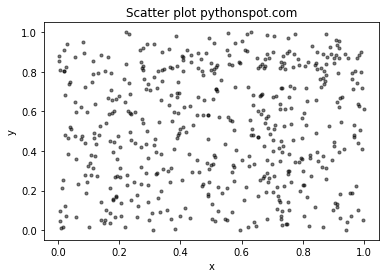

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

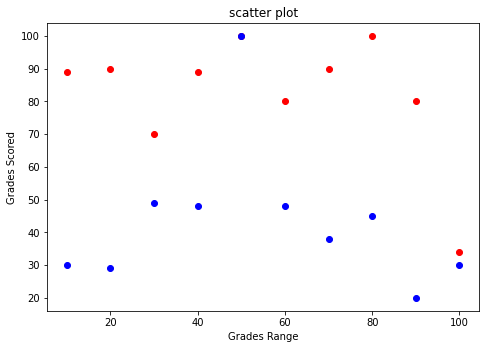

In [26]:
import matplotlib.pyplot as plt
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

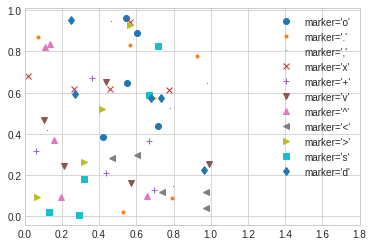

In [28]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

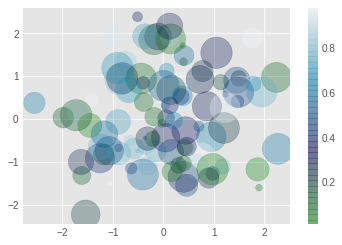

In [53]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='ocean')
plt.colorbar();  # show color scale

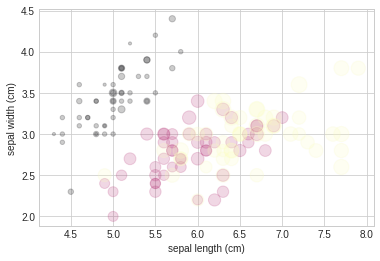

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='magma')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

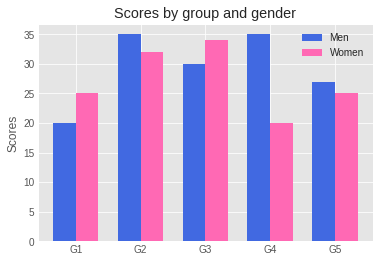

In [10]:
import numpy as np
plt.style.use('ggplot')

N = 5
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men', color='royalblue')
plt.bar(ind + width, women_means, width,
    label='Women', color='hotpink')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

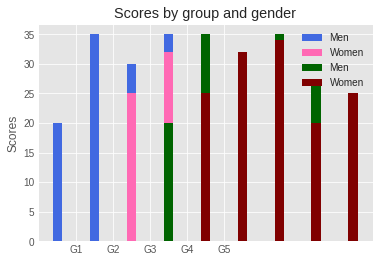

In [16]:
import numpy as np
plt.style.use('ggplot')

N = 5
arr_1 = [20, 35, 30, 35, 27]
arr_2 = [25, 32, 34, 20, 25]
arr_3 = [20, 35, 30, 35, 27]
arr_4 = [25, 32, 34, 20, 25]

ind = np.arange(N) 
width = 1       
plt.bar(ind, arr_1, width/4, label='Men', color='royalblue')
plt.bar(ind + width*2, arr_2, width/4, label='Women', color='hotpink')
plt.bar(ind + width*3, arr_3, width/4, label='Men', color='darkgreen')
plt.bar(ind + width*4, arr_4, width/4, label='Women', color='maroon')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

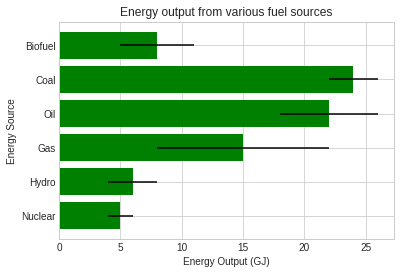

In [32]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
variance = [1, 2, 7, 4, 2, 3]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='green', xerr=variance)
plt.ylabel("Energy Source")
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.yticks(x_pos, x)

plt.show()

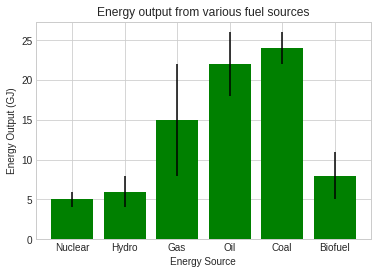

In [33]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
variance = [1, 2, 7, 4, 2, 3]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green', yerr=variance)
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

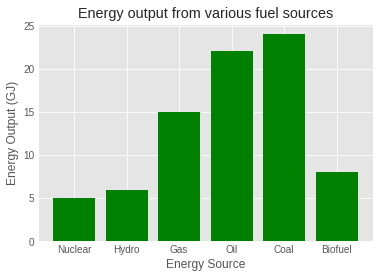

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

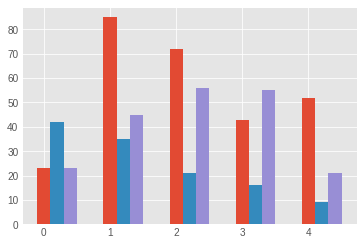

In [41]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [23,85, 72, 43, 52]
data2 = [42, 35, 21, 16, 9]
data3 = [23, 45, 56, 55, 21]
width =0.2
plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)
plt.bar(np.arange(len(data3))+ width+width, data3, width=width)
plt.show()

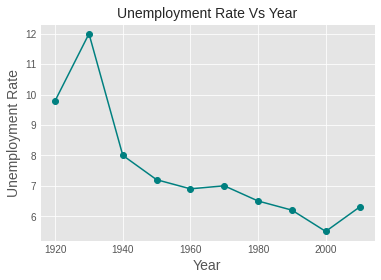

In [45]:
import matplotlib.pyplot as plt
   
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
  
plt.plot(Year, Unemployment_Rate, color='teal', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()

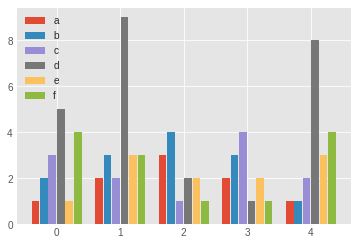

In [17]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
        "a": [1, 2, 3, 2, 1],
        "b": [2, 3, 4, 3, 1],
        "c": [3, 2, 1, 4, 2],
        "d": [5, 9, 2, 1, 8],
        "e": [1, 3, 2, 2, 3],
        "f": [4, 3, 1, 1, 4],
    }

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.show()